**Q4-Problem Statement:**
***Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm Dataset***

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

**Data Ingestion**

In [2]:
df=pd.read_csv(r"C:\Users\XMALL\Downloads\archive (16)\online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

***Target column***

In [8]:
df['Weekend']=df['Weekend'].astype(str,errors='ignore')
df['Revenue']=df['Revenue'].astype(str,errors='ignore')

In [9]:
l = list()
for weekend, revenue in zip(df['Weekend'], df['Revenue']):
    if weekend == 'True' and revenue == 'True':
        l.append('weekend_revenue')
    elif weekend == 'False' and revenue == 'True':
        l.append('non_weekend_revenue')
    else :
        l.append('no_revenue')
df['target']=l

***Data Visualization***

In [10]:
df_num= df.select_dtypes(include=np.number)
df_category=df.select_dtypes(include='O')

***Numerical Data Analysis***

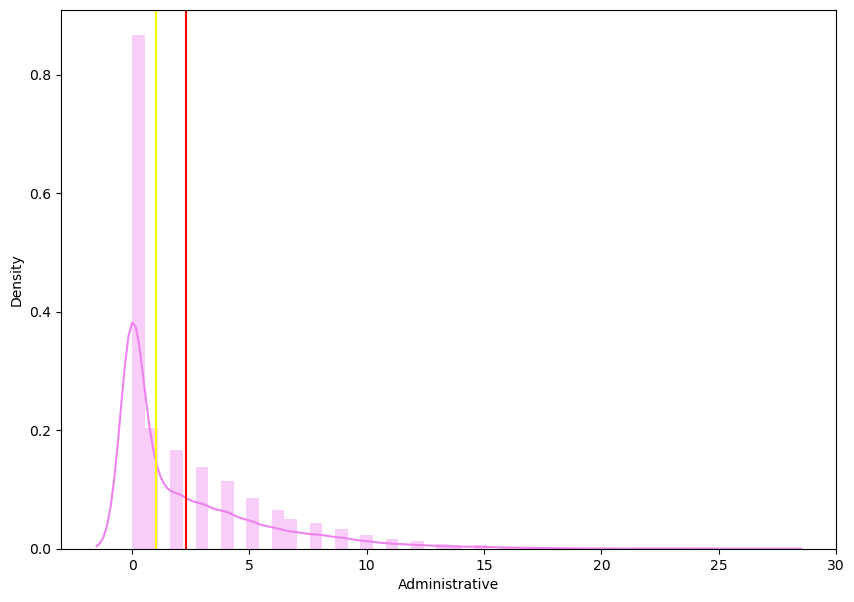

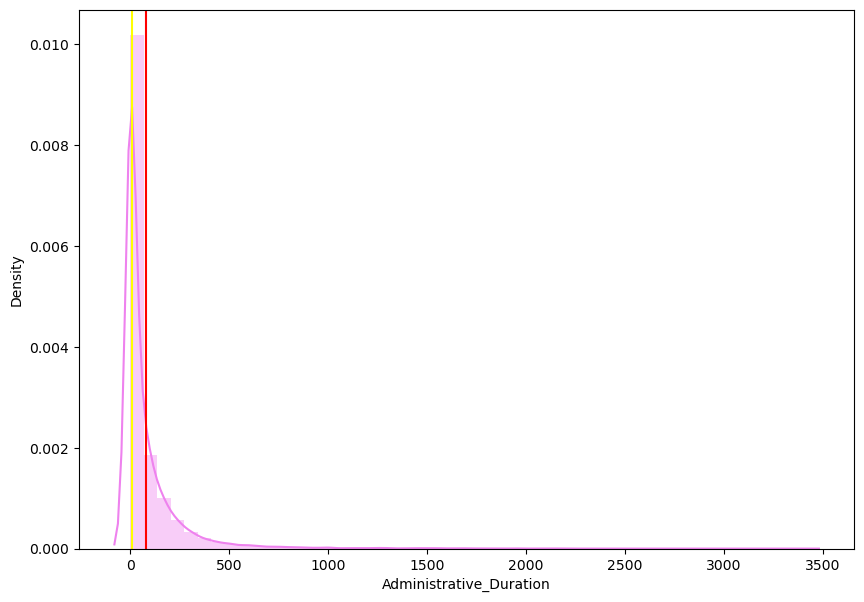

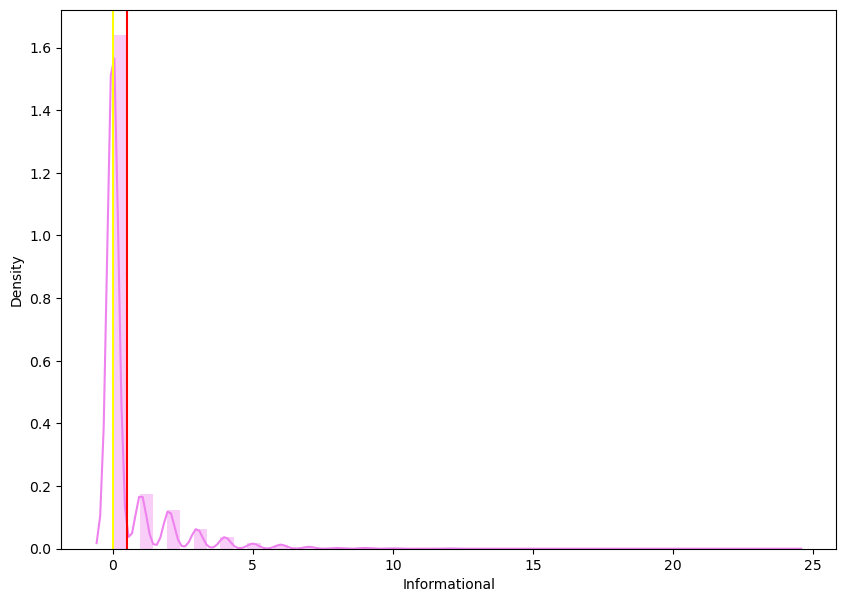

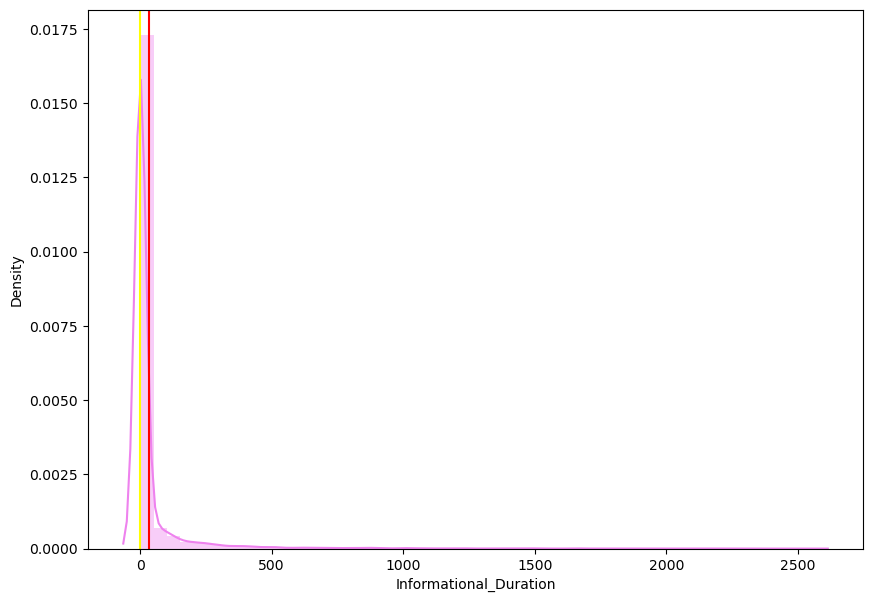

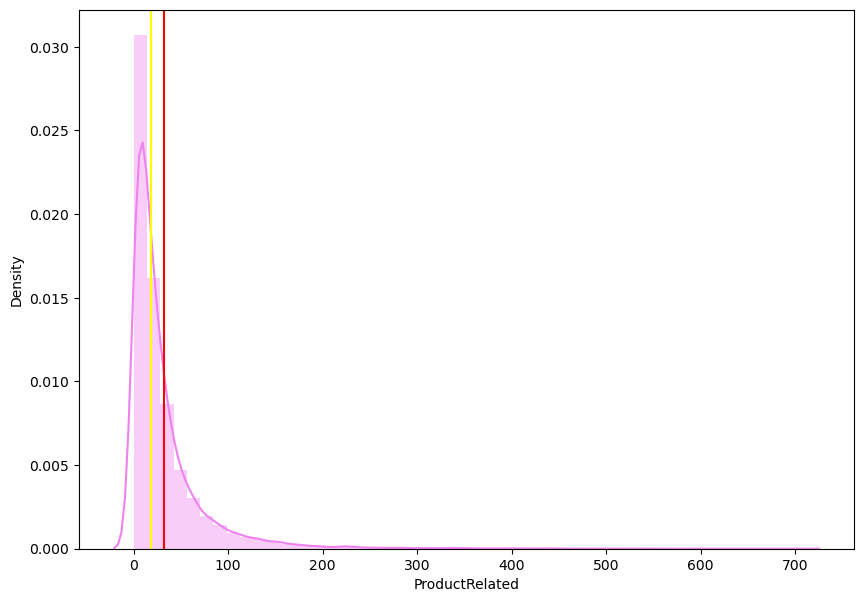

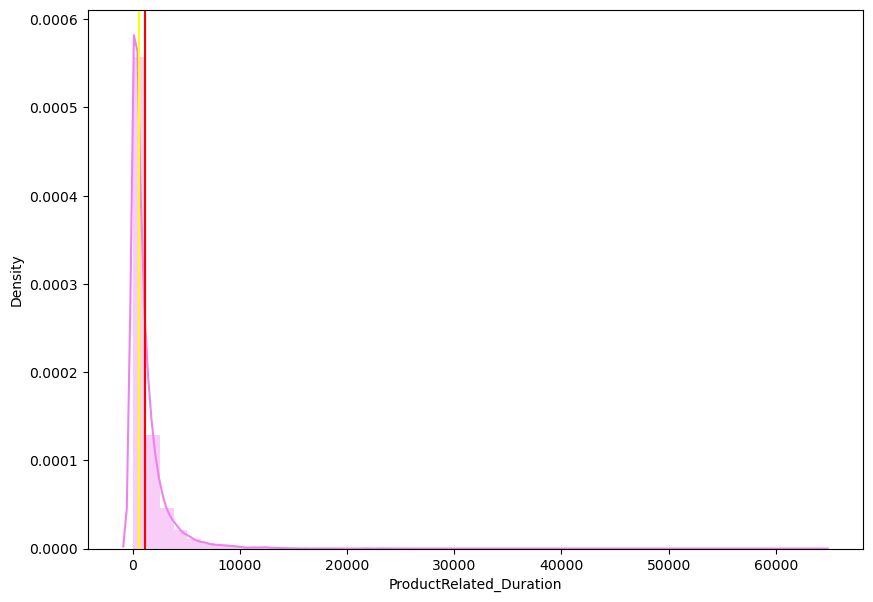

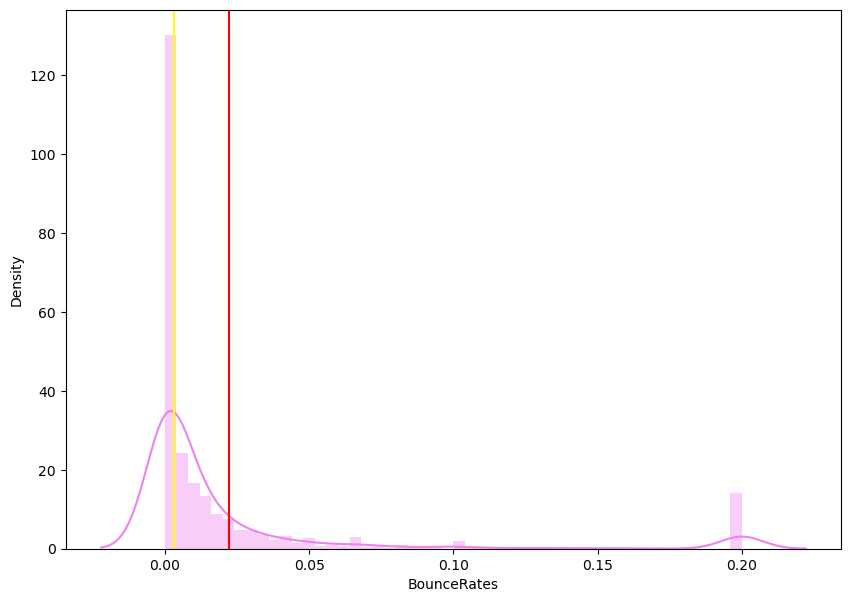

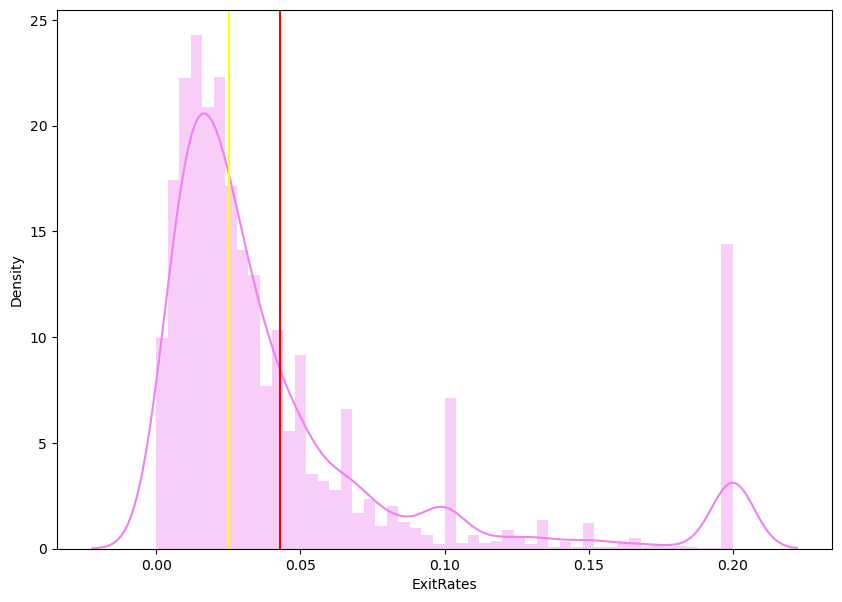

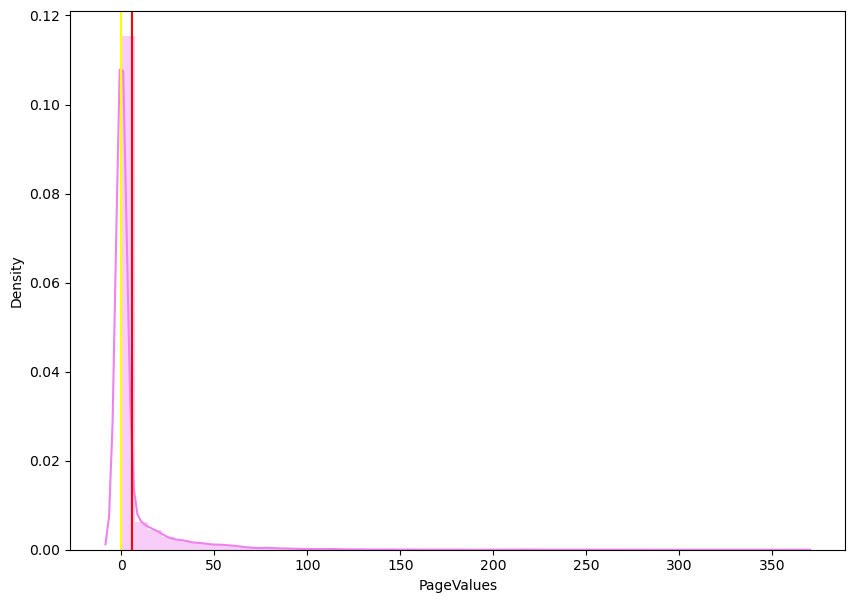

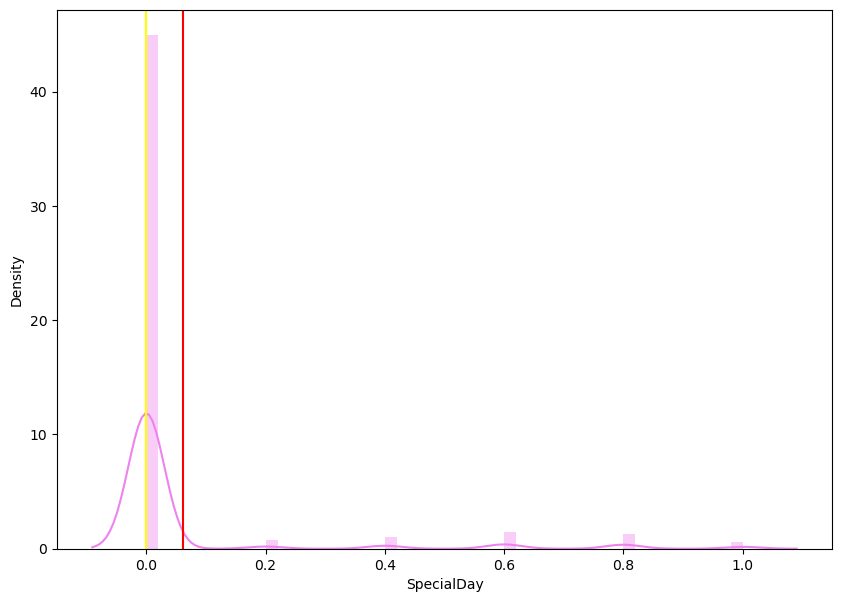

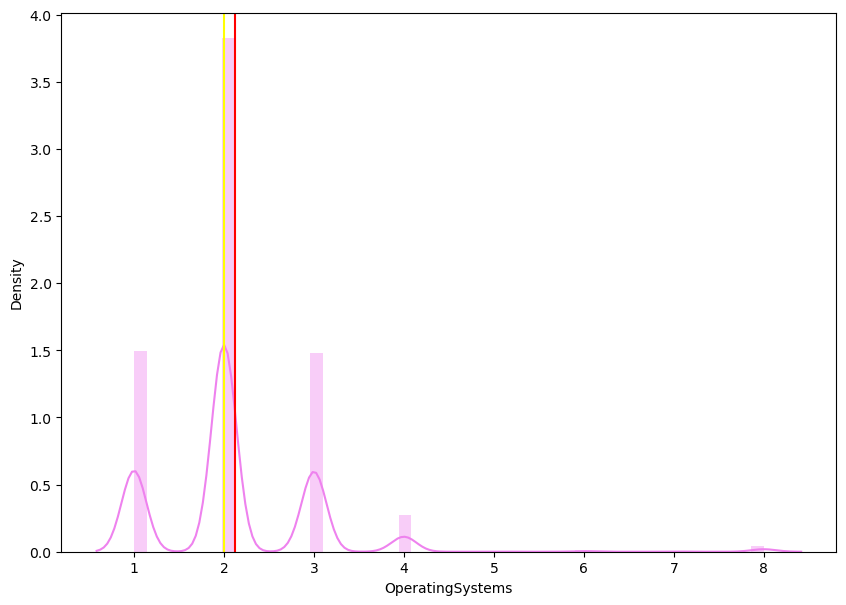

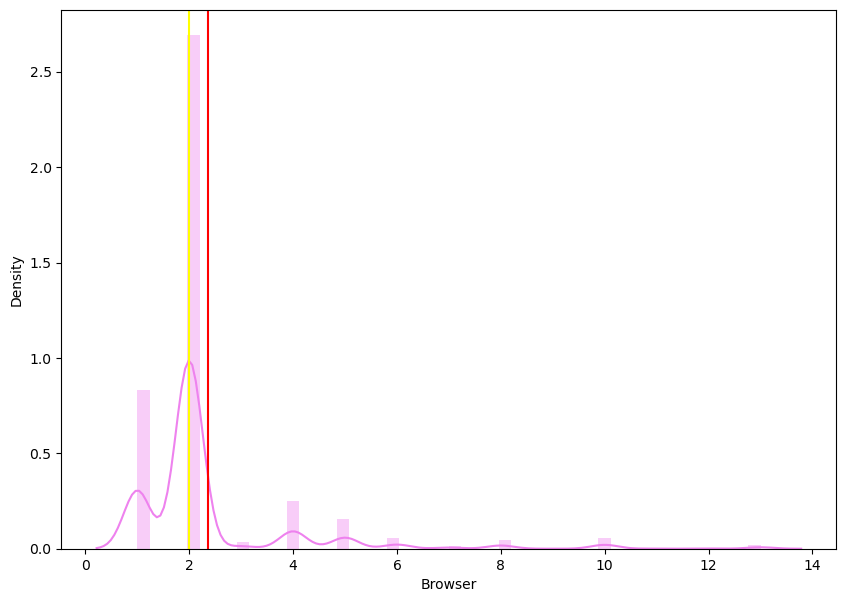

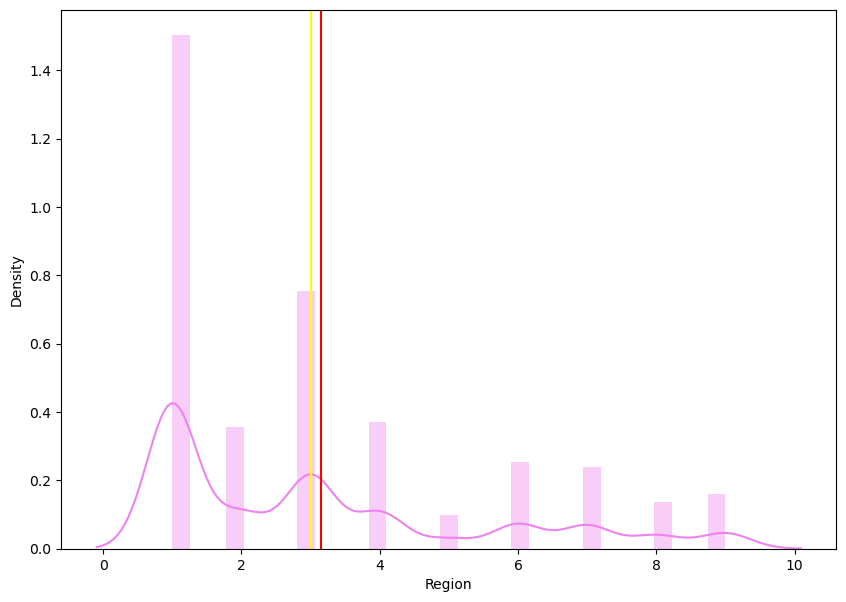

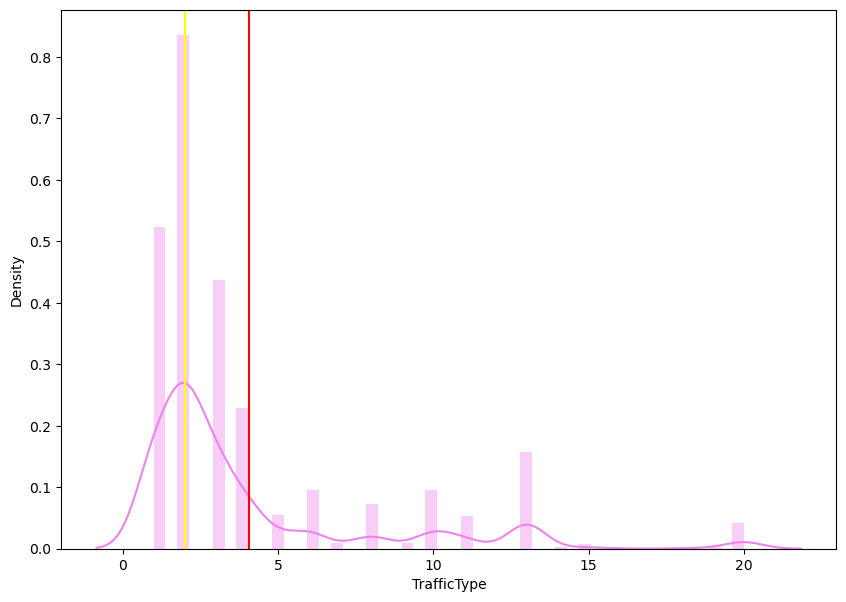

In [12]:
for i in df_num.columns:
    plt.figure(figsize =(10,7))
    sns.distplot(df_num[i], color = 'violet')
    plt.axvline(x = np.mean(df_num[i]), color = 'red')
    plt.axvline(x = np.median(df_num[i]), color = 'yellow')
    plt.show()

***Categorical Data***

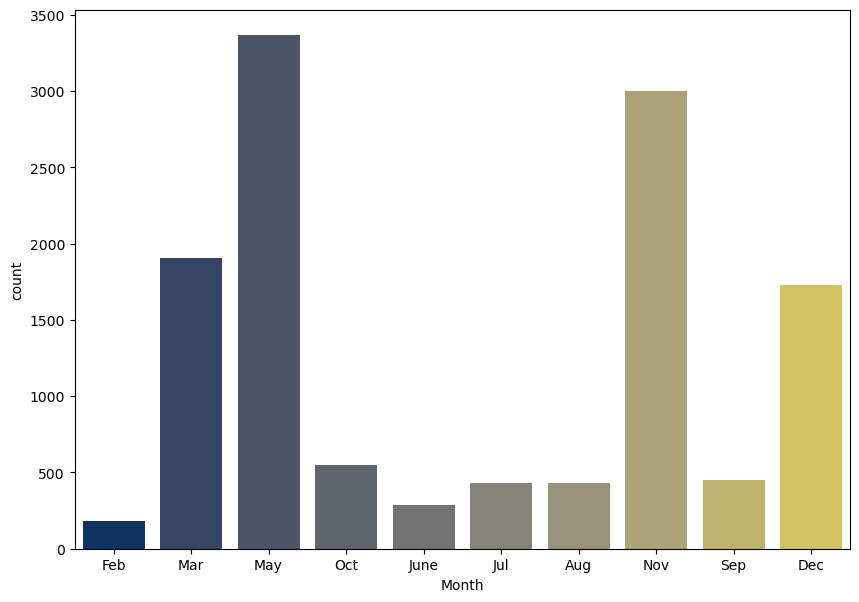

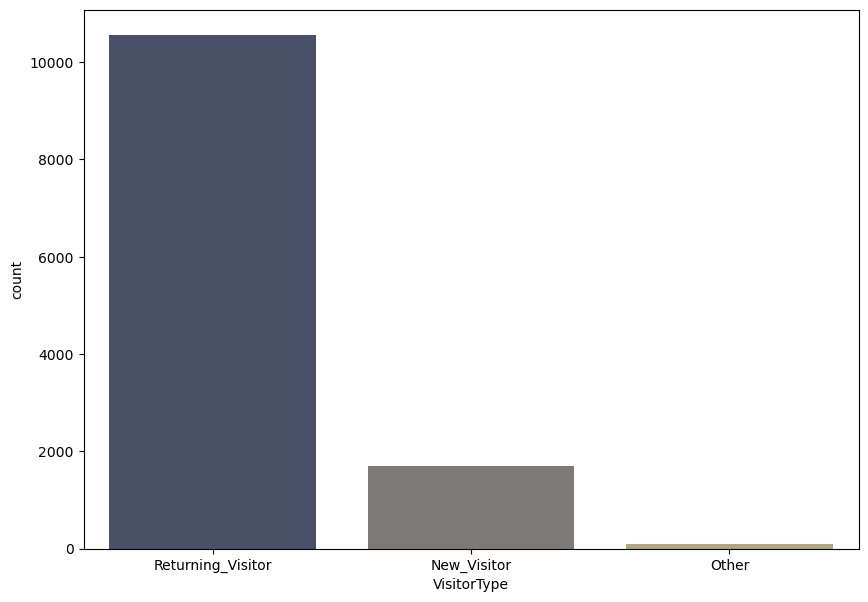

In [13]:
for i in df_category.drop(['Weekend', 'Revenue', 'target'], axis = 1):
    plt.figure(figsize =(10,7))
    sns.countplot(df_category[i], palette='cividis')
    plt.show()

***Target Variable ***

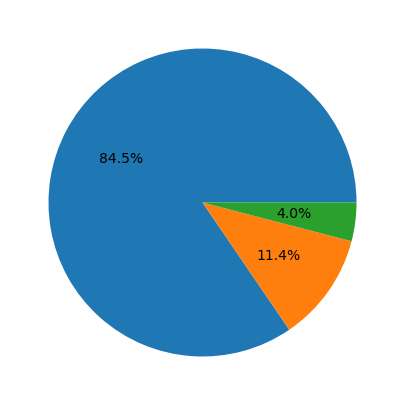

In [14]:
plt.figure(figsize=(10,5))
plt.pie(df.target.value_counts(), autopct='%1.1f%%')
plt.show()

In [15]:
df.target.value_counts()

no_revenue             10422
non_weekend_revenue     1409
weekend_revenue          499
Name: target, dtype: int64

***Numeric***

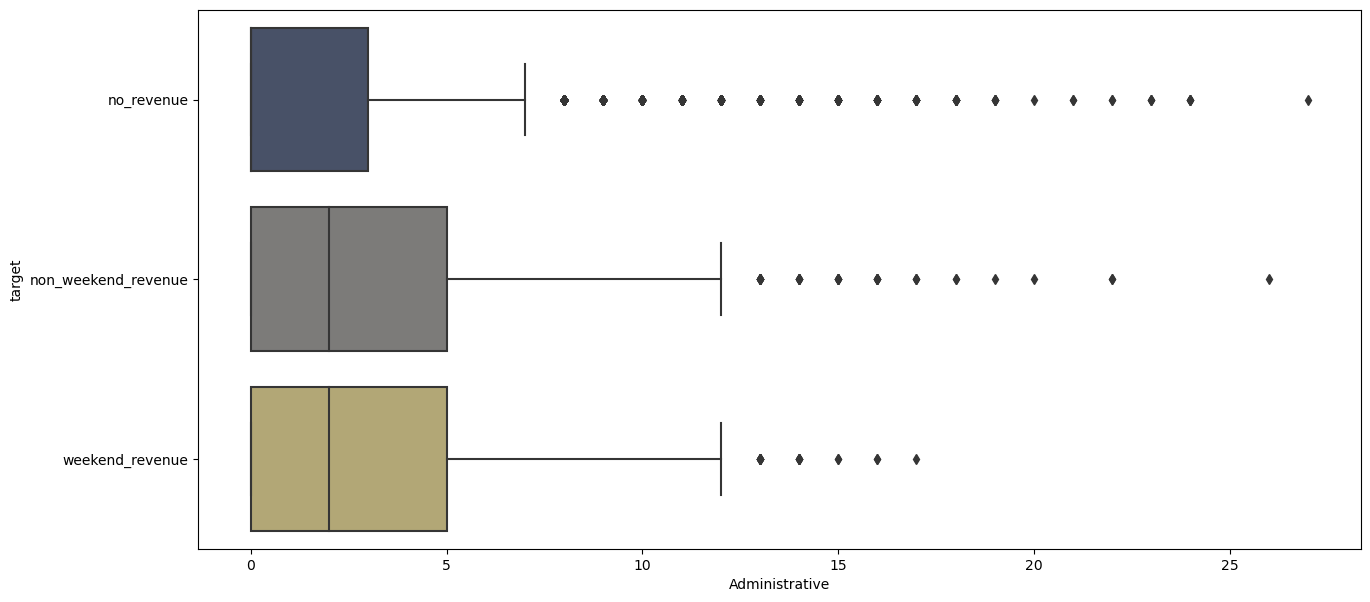

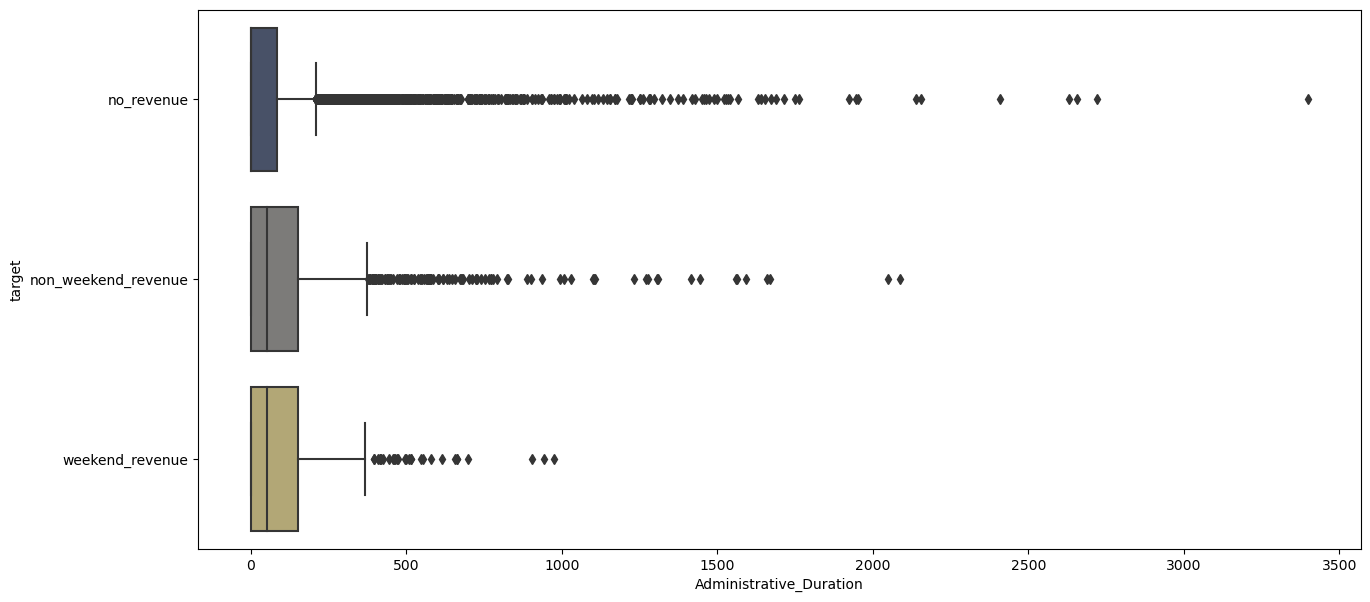

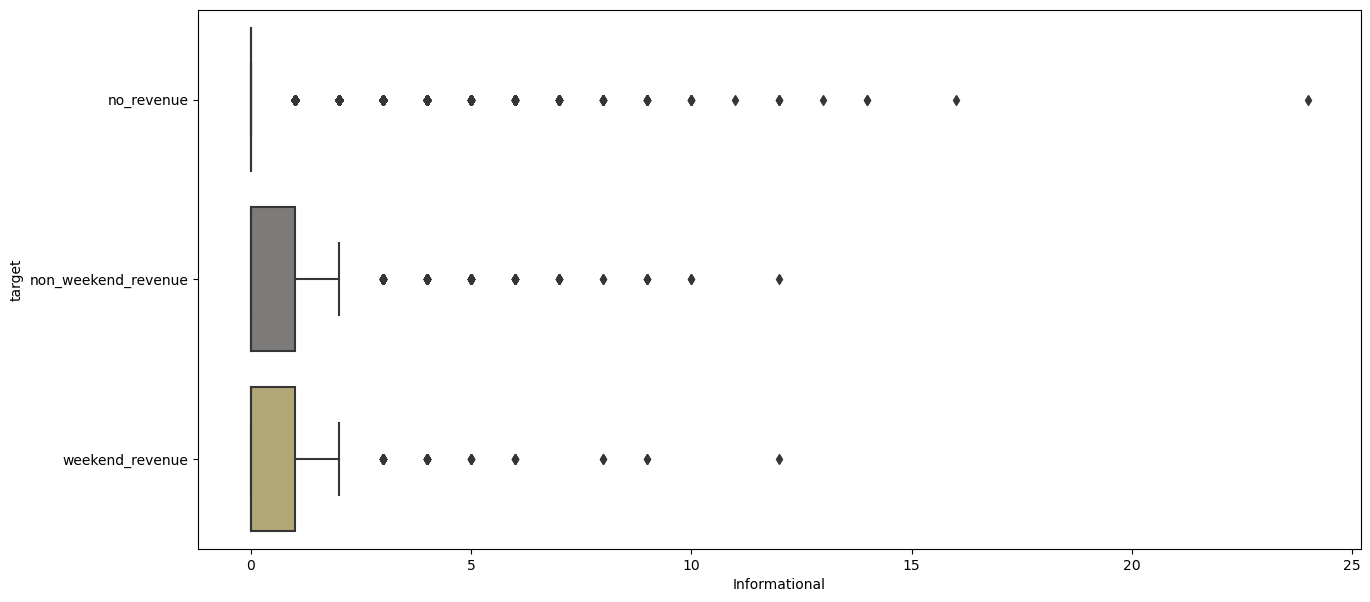

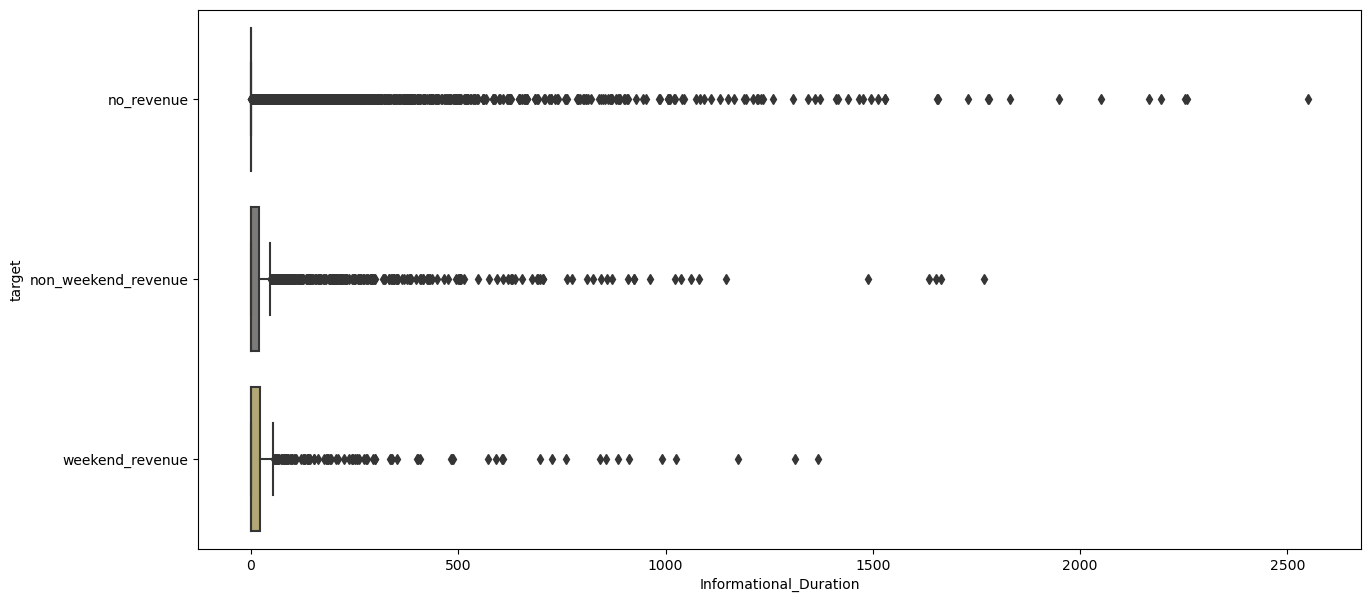

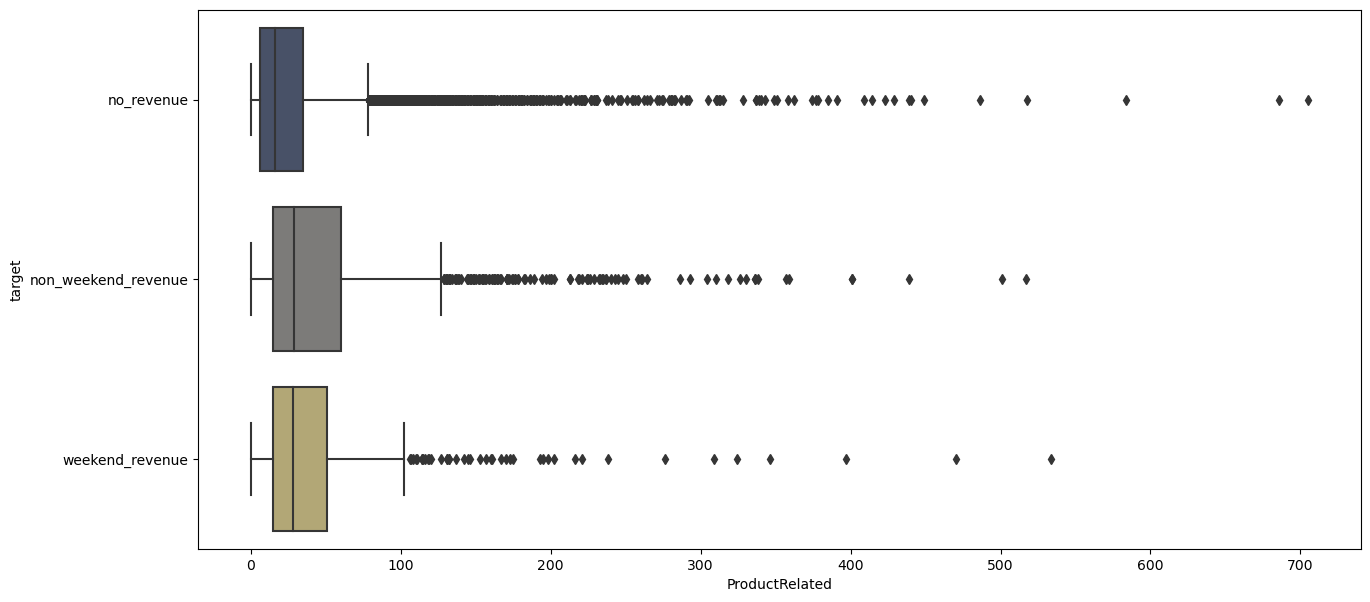

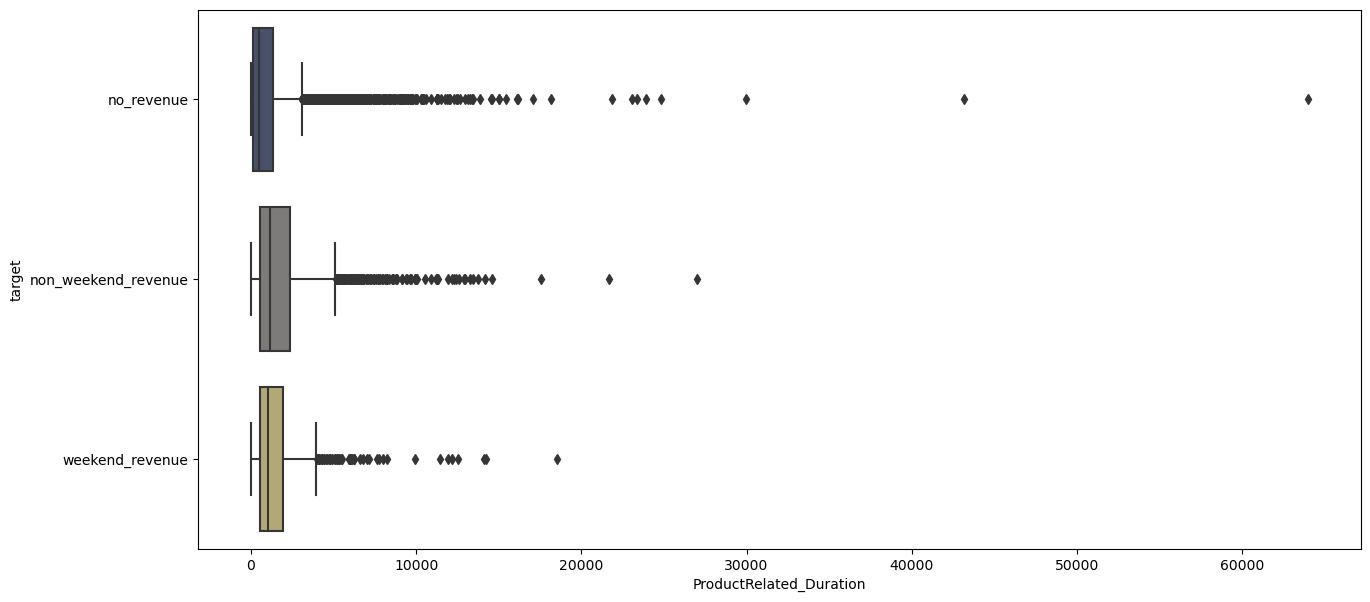

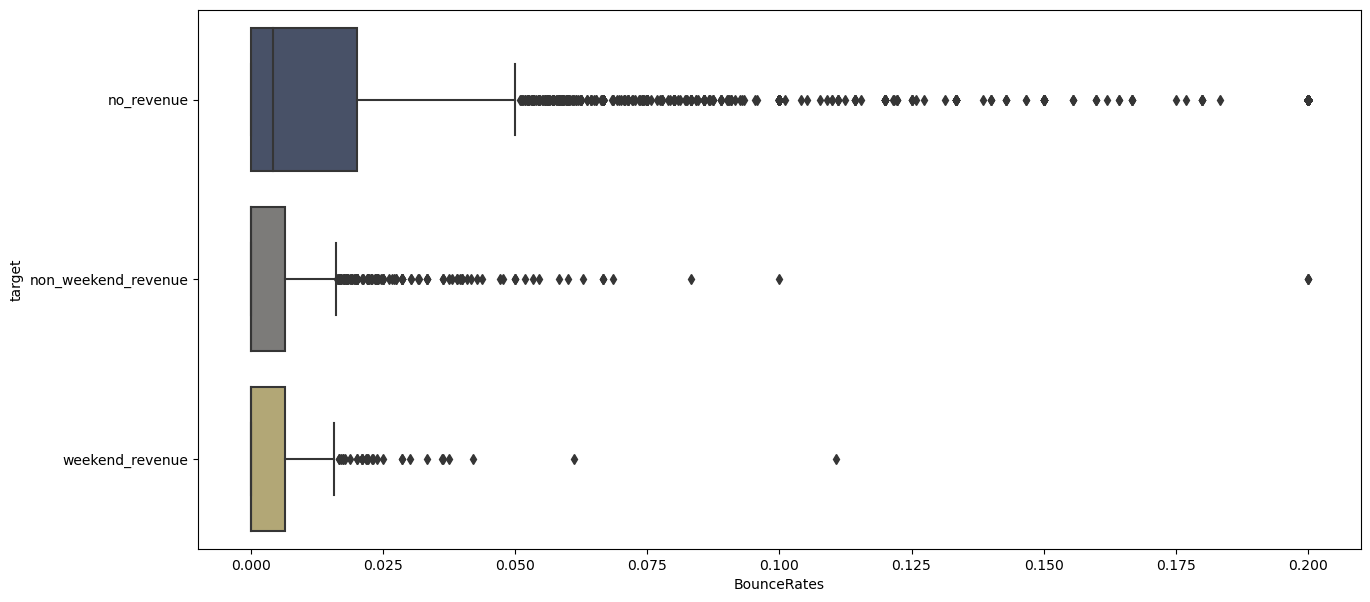

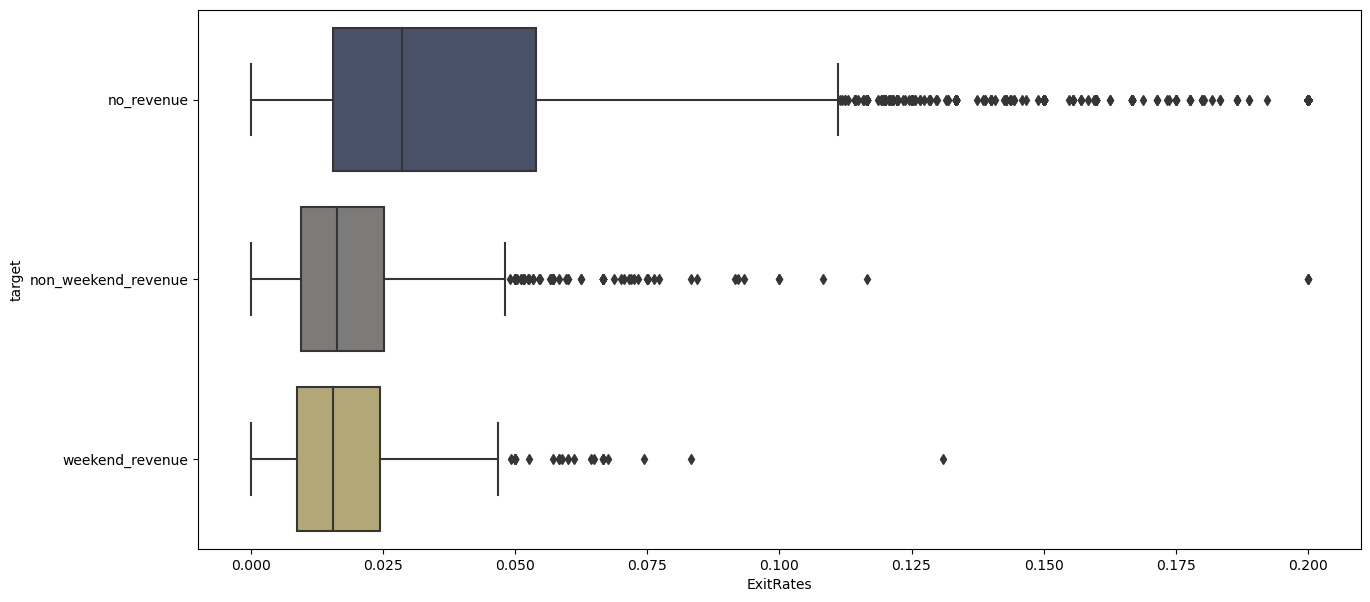

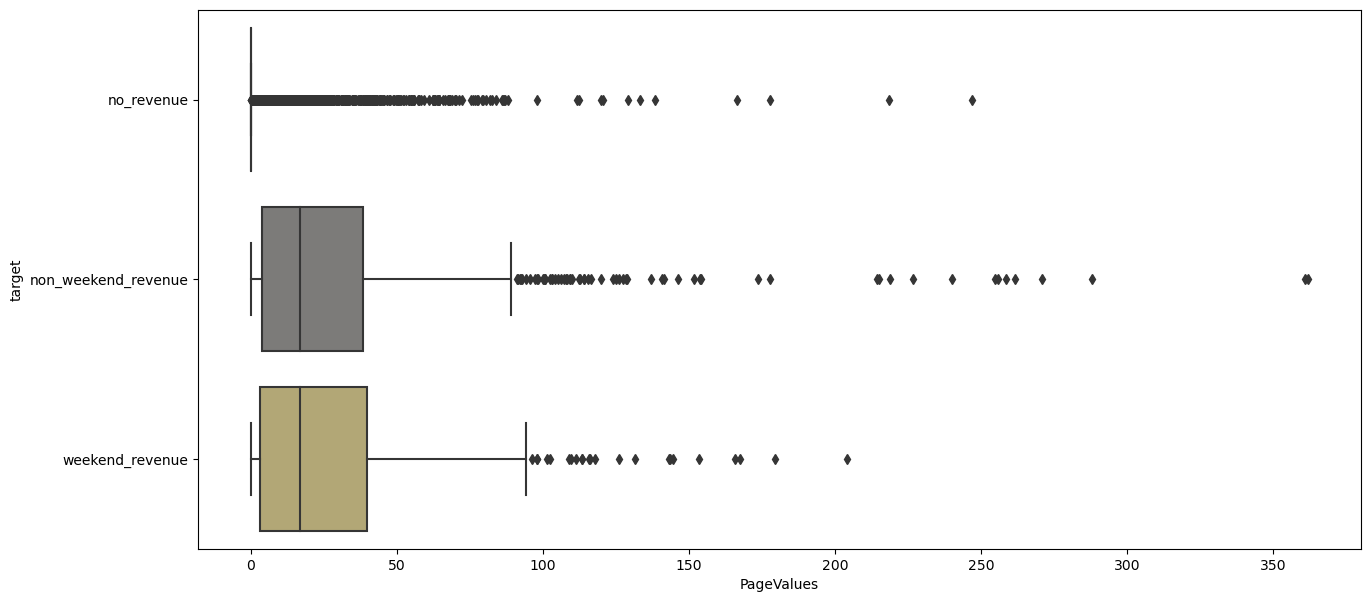

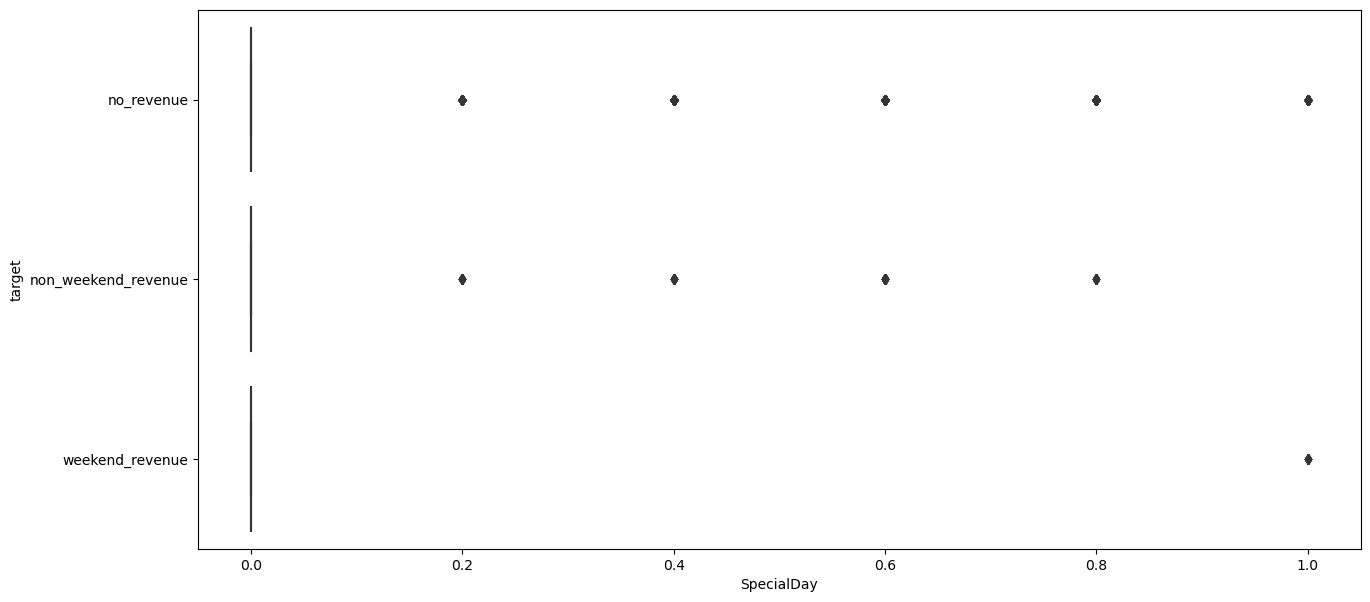

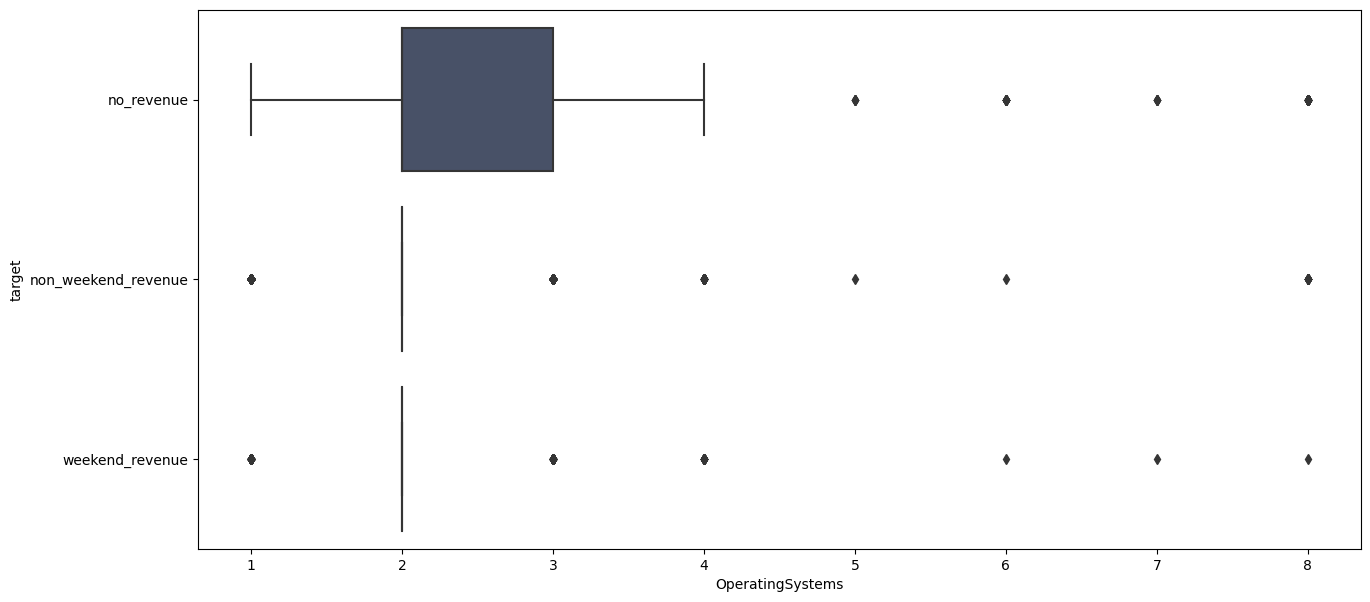

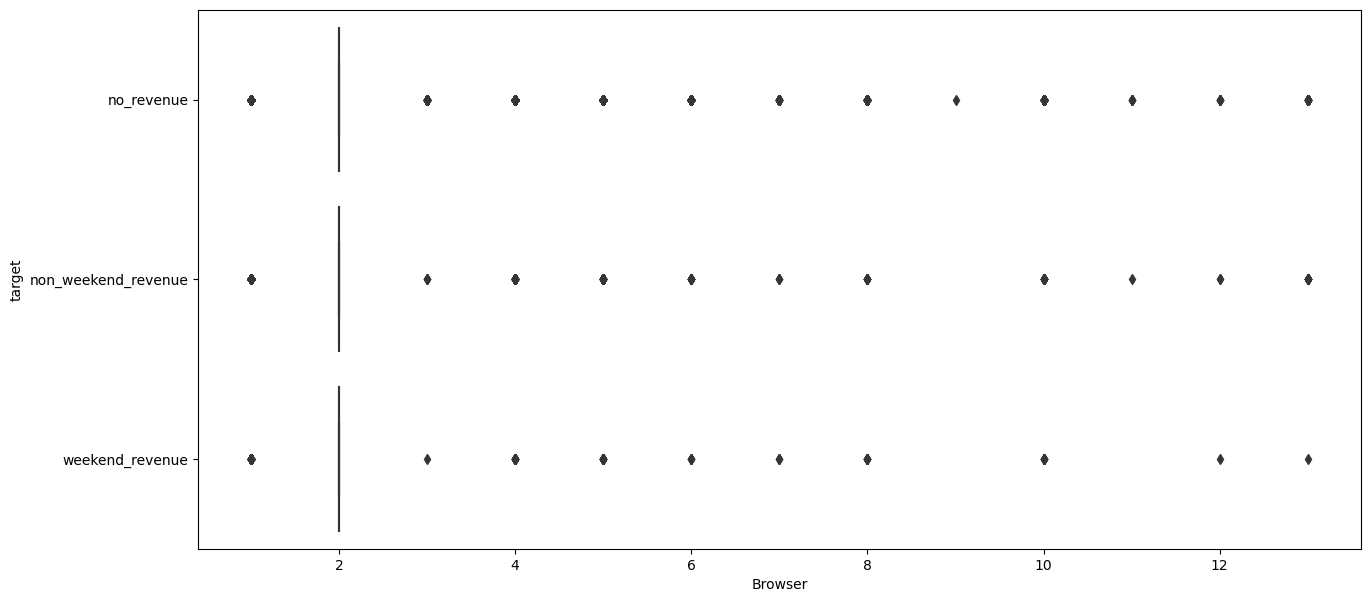

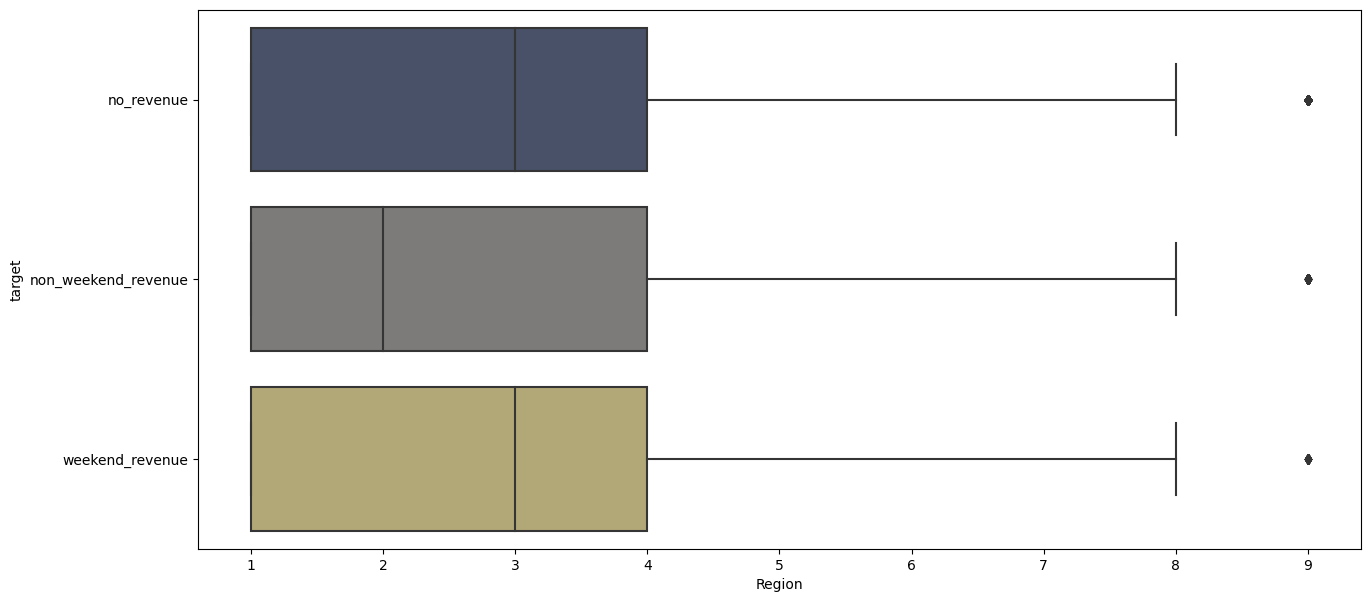

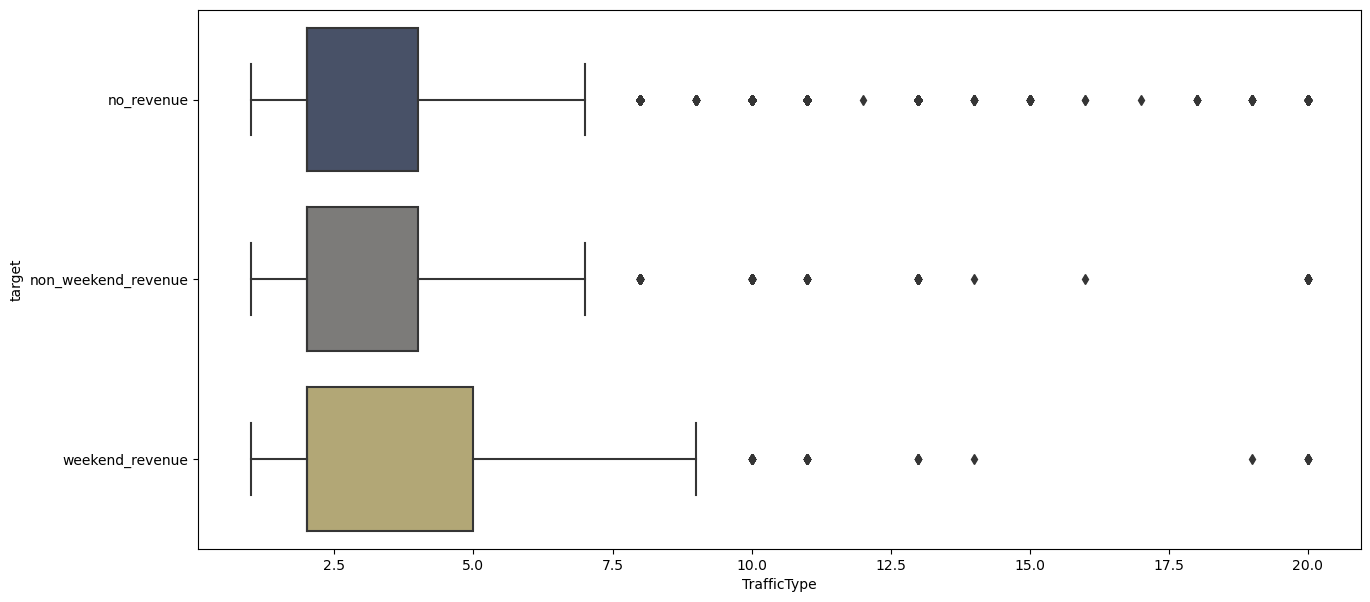

In [24]:
for i in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize =(15,7))
    sns.boxplot(y='target',x=i,data=df, palette='cividis')
    plt.show()

***Correlation plot***

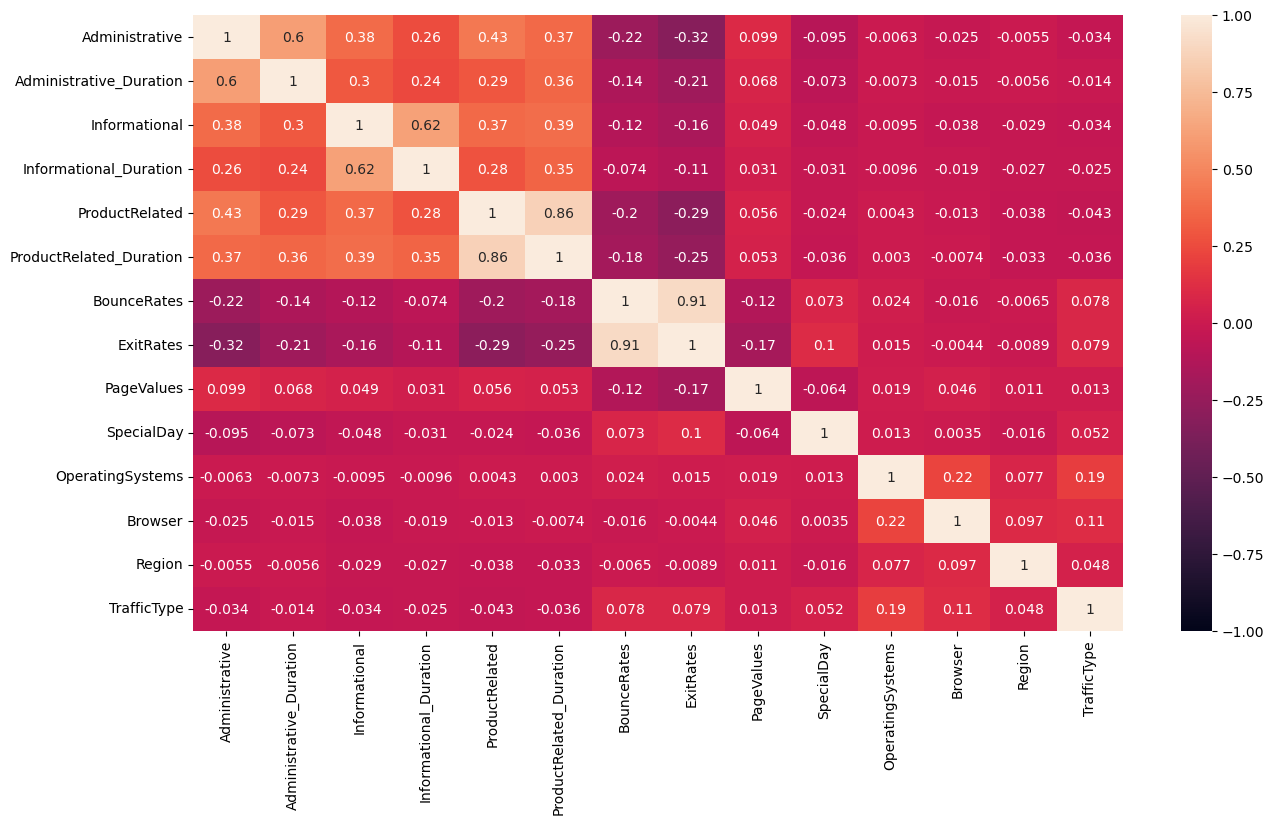

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True, vmax=1, vmin=-1)
plt.show()

In [29]:
drop_column=['ExitRates', 'ProductRelated_Duration']
df.drop(drop_column,axis=1,inplace=True)

***Data Selection***

***Splitting data into train and test data***

In [35]:
train,test=train_test_split(df, train_size=0.75,random_state=42)
train.shape,test.shape

((9247, 17), (3083, 17))

***Encoding***

In [36]:
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])

In [37]:
train.target.value_counts()

0    7828
1    1058
2     361
Name: target, dtype: int64

***X-Y Split***

***To predict Revenue***

In [38]:
xtrain_rev=train.iloc[:,:-3]
ytrain_rev=train['target']
xtest_rev=test.iloc[:,:-3]
ytest_rev=test['target']
xtrain_rev.shape,ytrain_rev.shape,xtest_rev.shape,ytest_rev.shape

((9247, 14), (9247,), (3083, 14), (3083,))

***For predicting Informational_Duration***

In [40]:
xtrain_inf=train.drop(['target','Informational_Duration'],axis=1)
ytrain_inf=train['Informational_Duration']
xtest_inf=test.drop(['target','Informational_Duration'],axis=1)
ytest_inf=test['Informational_Duration']
xtrain_inf.shape,ytrain_inf.shape,xtest_inf.shape,ytest_inf.shape

((9247, 15), (9247,), (3083, 15), (3083,))

***Scaling***

***Revenue predictors***

In [41]:
for i in xtrain_rev.columns:
    xtrain_arr = xtrain_rev[i].values.reshape(-1,1)
    xtest_arr = xtest_rev[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_rev[i] = ss.transform(xtrain_arr)
    xtest_rev[i] = ss.transform(xtest_arr)

***Informational_Duration predictors***

In [43]:
for i in xtrain_inf.columns:
    xtrain_arr = xtrain_inf[i].values.reshape(-1,1)
    xtest_arr = xtest_inf[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_inf[i] = ss.transform(xtrain_arr)
    xtest_inf[i] = ss.transform(xtest_arr)

***Scaling the train data using SMOTE***

In [49]:
smote = SMOTE()
xtrain_rev_smote, ytrain_rev_smote = smote.fit_resample(xtrain_rev, ytrain_rev)

In [50]:
ytrain_rev_smote.value_counts(normalize=True)

1    0.333333
0    0.333333
2    0.333333
Name: target, dtype: float64

***PCA***

In [52]:
pca = PCA(n_components=2)
xtrain_rev_pca = pca.fit_transform(xtrain_rev)
xtest_rev_pca = pca.transform(xtest_rev)

***Feature Selection***

In [53]:
xtrain_rev_fs = xtrain_rev.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)
xtest_rev_fs = xtest_rev.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)

***Model Training (Revenue)***

In [55]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev, ytrain_rev)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2594
           1       0.56      0.27      0.36       351
           2       0.00      0.00      0.00       138

    accuracy                           0.86      3083
   macro avg       0.48      0.42      0.43      3083
weighted avg       0.80      0.86      0.82      3083


DECISIONTREE
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2594
           1       0.38      0.40      0.39       351
           2       0.21      0.21      0.21       138

    accuracy                           0.82      3083
   macro avg       0.50      0.51      0.50      3083
weighted avg       0.83      0.82      0.82      3083


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2594
           1       0.53      0.44      0.48       351
           2      

***With Smote and Class_weights***

In [56]:
class_weights = {0: 1, 1: 5, 2: 10}

models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(class_weight=class_weights),
         'RandomForestClassifier':RandomForestClassifier(class_weight=class_weights),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_smote, ytrain_rev_smote)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2594
           1       0.40      0.40      0.40       351
           2       0.12      0.33      0.18       138

    accuracy                           0.79      3083
   macro avg       0.49      0.53      0.50      3083
weighted avg       0.85      0.79      0.82      3083


DECISIONTREE
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2594
           1       0.37      0.47      0.42       351
           2       0.15      0.19      0.16       138

    accuracy                           0.80      3083
   macro avg       0.48      0.51      0.50      3083
weighted avg       0.83      0.80      0.82      3083


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2594
           1       0.46      0.65      0.54       351
           2      

***Smote with Feature selection***

In [57]:
#class_weights = {0: 1, 1: 5, 2: 10}

xtrain_rev_smote_fs = xtrain_rev_smote.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)
xtest_rev_fs = xtest_rev.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)

models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_smote_fs, ytrain_rev_smote)
    ypred_rev = model.predict(xtest_rev_fs)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2594
           1       0.40      0.39      0.40       351
           2       0.15      0.40      0.21       138

    accuracy                           0.79      3083
   macro avg       0.50      0.55      0.51      3083
weighted avg       0.85      0.79      0.82      3083


DECISIONTREE
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2594
           1       0.35      0.47      0.40       351
           2       0.16      0.24      0.19       138

    accuracy                           0.80      3083
   macro avg       0.48      0.53      0.50      3083
weighted avg       0.84      0.80      0.82      3083


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2594
           1       0.42      0.58      0.49       351
           2      

***Using PCA***

In [58]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_pca, ytrain_rev)
    ypred_rev = model.predict(xtest_rev_pca)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2594
           1       0.32      0.02      0.03       351
           2       0.00      0.00      0.00       138

    accuracy                           0.84      3083
   macro avg       0.39      0.34      0.31      3083
weighted avg       0.74      0.84      0.77      3083


DECISIONTREE
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2594
           1       0.16      0.17      0.17       351
           2       0.06      0.05      0.06       138

    accuracy                           0.74      3083
   macro avg       0.36      0.36      0.36      3083
weighted avg       0.74      0.74      0.74      3083


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2594
           1       0.19      0.06      0.09       351
           2      

***Feature selection***

In [59]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_fs, ytrain_rev)
    ypred_rev = model.predict(xtest_rev_fs)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2594
           1       0.56      0.28      0.37       351
           2       0.00      0.00      0.00       138

    accuracy                           0.86      3083
   macro avg       0.48      0.42      0.43      3083
weighted avg       0.80      0.86      0.82      3083


DECISIONTREE
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2594
           1       0.42      0.43      0.43       351
           2       0.22      0.20      0.21       138

    accuracy                           0.83      3083
   macro avg       0.52      0.52      0.52      3083
weighted avg       0.83      0.83      0.83      3083


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2594
           1       0.53      0.47      0.50       351
           2      

***BSET F1***

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate the features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Encoding
categorical_columns = X.select_dtypes(include='object').columns.tolist()
encoded_data = pd.get_dummies(X, columns=categorical_columns)
X_encoded = encoded_data.copy()
X_encoded.columns = encoded_data.columns

# Calculate ANOVA F-values for numeric columns
numeric_columns = X.select_dtypes(include=np.number).columns
anova_scores = pd.Series(index=numeric_columns)
for col in numeric_columns:
    f_value, _ = f_oneway(*(X_encoded.loc[y == cls, col] for cls in y.unique()))
    anova_scores[col] = f_value

# Calculate chi-square statistics and p-values for encoded categorical columns
chi2_scores = pd.Series(index=encoded_data.columns)
p_values = pd.Series(index=encoded_data.columns)
for col in encoded_data.columns:
    cross_tab = pd.crosstab(X_encoded[col], y)
    chi2_stat, p_value, _, _ = chi2_contingency(cross_tab)
    chi2_scores[col] = chi2_stat
    p_values[col] = p_value

# Sort the scores in descending order
anova_scores = anova_scores.sort_values(ascending=False)
chi2_scores = chi2_scores.sort_values(ascending=False)
p_values = p_values.sort_values()

# Print the top relevant numeric and categorical columns
top_numeric_columns = anova_scores.index
top_categorical_columns = chi2_scores.index
print("Top Numeric Columns:")
print(anova_scores)
print("\nTop Categorical Columns (based on Chi-square test):")
print(chi2_scores)
print("\nP-values:")
print(p_values)

Top Numeric Columns:
PageValues                 1974.479504
ProductRelated              160.879093
BounceRates                 143.296204
Administrative              121.379535
Informational                56.690208
Administrative_Duration      56.411967
SpecialDay                   42.121140
Informational_Duration       30.656750
Browser                       4.448438
OperatingSystems              1.573167
Region                        1.025822
TrafficType                   0.232911
dtype: float64

Top Categorical Columns (based on Chi-square test):
PageValues                       19354.959336
Revenue_True                     12330.000000
Revenue_False                    12330.000000
Administrative_Duration           9749.865317
BounceRates                       4538.258577
Informational_Duration            4016.052483
Weekend_True                      2074.997904
Weekend_False                     2074.997904
ProductRelated                    1512.300311
Administrative               

***Df_downsampled***

In [63]:
# Separate majority and minority classes
majority_class = 'no_revenue'
minority_classes = ['non_weekend_revenue', 'weekend_revenue']

# Downsample the majority class
df_majority = df[df['target'] == majority_class]
df_minority = df[df['target'].isin(minority_classes)]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority))

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display the value counts of the downsampled target variable
print(df_downsampled['target'].value_counts())

print(df_downsampled['target'].value_counts())

no_revenue             1908
non_weekend_revenue    1409
weekend_revenue         499
Name: target, dtype: int64
no_revenue             1908
non_weekend_revenue    1409
weekend_revenue         499
Name: target, dtype: int64


In [64]:
train,test=train_test_split(df_downsampled, train_size=0.7,random_state=5)
train.shape,test.shape

((2671, 17), (1145, 17))

In [65]:
# Encoding
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])

In [66]:
# X-Y split
xtrain_rev=train.iloc[:,:-3]
ytrain_rev=train['target']
xtest_rev=test.iloc[:,:-3]
ytest_rev=test['target']
xtrain_rev.shape,ytrain_rev.shape,xtest_rev.shape,ytest_rev.shape

((2671, 14), (2671,), (1145, 14), (1145,))

In [67]:
# Scaling
for i in xtrain_rev.columns:
    xtrain_arr = xtrain_rev[i].values.reshape(-1,1)
    xtest_arr = xtest_rev[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_rev[i] = ss.transform(xtrain_arr)
    xtest_rev[i] = ss.transform(xtest_arr)

In [68]:
smote = SMOTE()
xtrain_rev_smote, ytrain_rev_smote = smote.fit_resample(xtrain_rev, ytrain_rev)

In [69]:

ytrain_rev_smote.value_counts(normalize=True)

1    0.333333
0    0.333333
2    0.333333
Name: target, dtype: float64

In [70]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
          'KNN_Classifier': KNeighborsClassifier(n_neighbors=5),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'Adaboost': AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev, ytrain_rev)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       564
           1       0.67      0.64      0.66       430
           2       0.00      0.00      0.00       151

    accuracy                           0.70      1145
   macro avg       0.46      0.52      0.49      1145
weighted avg       0.60      0.70      0.64      1145


KNN_CLASSIFIER
              precision    recall  f1-score   support

           0       0.68      0.85      0.75       564
           1       0.60      0.55      0.58       430
           2       0.18      0.05      0.07       151

    accuracy                           0.63      1145
   macro avg       0.49      0.48      0.47      1145
weighted avg       0.58      0.63      0.60      1145


DECISIONTREE
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       564
           1       0.61      0.62      0.62       430
           2       0.24   

In [71]:
class_weights = {0: 1, 1: 5, 2: 10}

models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
          'KNN_Classifier': KNeighborsClassifier(n_neighbors=5),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'Adaboost': AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_smote, ytrain_rev_smote)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       564
           1       0.68      0.37      0.48       430
           2       0.23      0.45      0.31       151

    accuracy                           0.62      1145
   macro avg       0.57      0.56      0.54      1145
weighted avg       0.67      0.62      0.63      1145


KNN_CLASSIFIER
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       564
           1       0.53      0.47      0.50       430
           2       0.20      0.36      0.26       151

    accuracy                           0.54      1145
   macro avg       0.48      0.49      0.48      1145
weighted avg       0.58      0.54      0.55      1145


DECISIONTREE
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       564
           1       0.61      0.62      0.61       430
           2       0.23   

In [72]:
#class_weights = {0: 1, 1: 5, 2: 10}

xtrain_rev_smote_fs = xtrain_rev_smote.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)
xtest_rev_fs = xtest_rev.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)

models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
          'KNN_Classifier': KNeighborsClassifier(n_neighbors=5),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'Adaboost': AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_smote_fs, ytrain_rev_smote)
    ypred_rev = model.predict(xtest_rev_fs)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       564
           1       0.68      0.37      0.48       430
           2       0.24      0.45      0.31       151

    accuracy                           0.63      1145
   macro avg       0.57      0.56      0.54      1145
weighted avg       0.67      0.63      0.63      1145


KNN_CLASSIFIER
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       564
           1       0.57      0.49      0.52       430
           2       0.18      0.32      0.23       151

    accuracy                           0.58      1145
   macro avg       0.52      0.51      0.50      1145
weighted avg       0.63      0.58      0.60      1145


DECISIONTREE
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       564
           1       0.59      0.57      0.58       430
           2       0.22   

In [74]:
# Separate the features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Encoding
categorical_columns = X.select_dtypes(include='object').columns.tolist()
encoded_data = pd.get_dummies(X, columns=categorical_columns)
X_encoded = encoded_data.copy()
X_encoded.columns = encoded_data.columns

# Calculate ANOVA F-values for numeric columns
numeric_columns = X.select_dtypes(include=np.number).columns
anova_scores = pd.Series(index=numeric_columns)
for col in numeric_columns:
    f_value, _ = f_oneway(*(X_encoded.loc[y == cls, col] for cls in y.unique()))
    anova_scores[col] = f_value

# Calculate chi-square statistics and p-values for encoded categorical columns
chi2_scores = pd.Series(index=encoded_data.columns)
p_values = pd.Series(index=encoded_data.columns)
for col in encoded_data.columns:
    cross_tab = pd.crosstab(X_encoded[col], y)
    chi2_stat, p_value, _, _ = chi2_contingency(cross_tab)
    chi2_scores[col] = chi2_stat
    p_values[col] = p_value

# Sort the scores in descending order
anova_scores = anova_scores.sort_values(ascending=False)
chi2_scores = chi2_scores.sort_values(ascending=False)
p_values = p_values.sort_values()

# Print the top relevant numeric and categorical columns
top_numeric_columns = anova_scores.index
top_categorical_columns = chi2_scores.index
print("Top Numeric Columns:")
print(anova_scores)
print("\nTop Categorical Columns (based on Chi-square test):")
print(chi2_scores)
print("\nP-values:")
print(p_values)

Top Numeric Columns:
PageValues                 1974.479504
ProductRelated              160.879093
BounceRates                 143.296204
Administrative              121.379535
Informational                56.690208
Administrative_Duration      56.411967
SpecialDay                   42.121140
Informational_Duration       30.656750
Browser                       4.448438
OperatingSystems              1.573167
Region                        1.025822
TrafficType                   0.232911
dtype: float64

Top Categorical Columns (based on Chi-square test):
PageValues                       19354.959336
Revenue_True                     12330.000000
Revenue_False                    12330.000000
Administrative_Duration           9749.865317
BounceRates                       4538.258577
Informational_Duration            4016.052483
Weekend_True                      2074.997904
Weekend_False                     2074.997904
ProductRelated                    1512.300311
Administrative               

***DF_upsampled***

In [75]:
# Separate majority and minority classes
majority_class = 'no_revenue'
minority_classes = ['non_weekend_revenue', 'weekend_revenue']

# Downsample the majority class
df_majority = df[df['target'] == majority_class]
df_minority = df[df['target'].isin(minority_classes)]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority))

# Upsample the minority classes
df_minority_upsampled = pd.concat([
    resample(df_minority[df_minority['target'] == cls], replace=True, n_samples=len(df_majority_downsampled))
    for cls in minority_classes
])

# Combine the downsampled majority class with the upsampled minority classes
df_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled])

# Display the value counts of the balanced target variable
print(df_balanced['target'].value_counts())

no_revenue             1908
non_weekend_revenue    1908
weekend_revenue        1908
Name: target, dtype: int64


In [76]:

df_balanced

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,target
6624,0,0.000000,0,0.0,15,0.000000,0.000000,0.0,Nov,2,2,7,20,Returning_Visitor,False,False,no_revenue
7401,0,0.000000,0,0.0,8,0.000000,0.000000,0.0,Jul,2,2,1,1,Returning_Visitor,True,False,no_revenue
8310,0,0.000000,0,0.0,4,0.000000,0.000000,0.0,Nov,2,5,6,11,Returning_Visitor,True,False,no_revenue
11602,1,12.000000,1,11.0,74,0.015541,0.000000,0.0,Nov,2,2,9,13,Returning_Visitor,False,False,no_revenue
7688,0,0.000000,0,0.0,6,0.000000,0.000000,0.0,Oct,2,5,1,1,Returning_Visitor,False,False,no_revenue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,0,0.000000,0,0.0,21,0.000000,16.158558,0.0,Nov,3,2,1,2,Returning_Visitor,True,True,weekend_revenue
3676,0,0.000000,0,0.0,22,0.000000,10.518095,0.0,May,2,2,7,4,Returning_Visitor,True,True,weekend_revenue
4160,2,44.000000,2,53.0,8,0.000000,56.623636,0.0,May,2,2,1,4,Returning_Visitor,True,True,weekend_revenue
4944,0,0.000000,1,28.0,19,0.021053,11.386421,0.0,May,4,1,6,4,Returning_Visitor,True,True,weekend_revenue


In [77]:
# TRAIN - TEST SPLIT
train,test=train_test_split(df_balanced, train_size=0.7,random_state=5)
train.shape,test.shape

# E N C O D I N G
# Encoding
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])
    
# X-Y split
xtrain_rev=train.iloc[:,:-3]
ytrain_rev=train['target']
xtest_rev=test.iloc[:,:-3]
ytest_rev=test['target']
xtrain_rev.shape,ytrain_rev.shape,xtest_rev.shape,ytest_rev.shape


# Scaling
for i in xtrain_rev.columns:
    xtrain_arr = xtrain_rev[i].values.reshape(-1,1)
    xtest_arr = xtest_rev[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_rev[i] = ss.transform(xtrain_arr)
    xtest_rev[i] = ss.transform(xtest_arr)

In [78]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
          'KNN_Classifier': KNeighborsClassifier(n_neighbors=5),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'Adaboost': AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev, ytrain_rev)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       556
           1       0.53      0.32      0.40       599
           2       0.48      0.49      0.49       563

    accuracy                           0.56      1718
   macro avg       0.55      0.57      0.54      1718
weighted avg       0.55      0.56      0.54      1718


KNN_CLASSIFIER
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       556
           1       0.63      0.55      0.59       599
           2       0.63      0.75      0.69       563

    accuracy                           0.65      1718
   macro avg       0.66      0.66      0.65      1718
weighted avg       0.66      0.65      0.65      1718


DECISIONTREE
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       556
           1       0.86      0.80      0.83       599
           2       0.85   